# South Africa Xenophobia Sentiment Analysis

## NLP final assessment

## Inroduction
Sentiment analysis is a natural language processing (NLP) technique used to determine the sentiment of a piece of text. Sentiment analysis involves analyzing the text to determine whether it is positive, negative, or neutral. Sentiment analysis can be used to analyze social media posts, customer reviews, and other types of user-generated content.

In [61]:
import pandas as pd
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter, defaultdict
import itertools
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Download required NLTK data
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\s.ziqubu.CMS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load the CSV file into a pandas DataFrame
data_url = 'XenophobiaData.csv'
df = pd.read_csv(data_url, encoding_errors= 'replace')
df.head()

,Datetime,Username,userID,Source,Text,Sentiment,Number of attacks
0,2022-07-18 20:57:33+00:00,JeleJele89,1.607348e+09,Twitter,@GivenReporter @MatthewsMahlubi Where are the ...,Negative,0
1,2022-07-18 20:15:58+00:00,JuryProjectZA,1.460000e+18,Twitter,We invite all those who have lost loved ones t...,Negative,0
2,2022-07-18 20:03:16+00:00,biasseDDD,9.360000e+17,Twitter,"After battling with HIV/AIDS for years, South ...",Negative,0
3,2022-07-18 17:52:13+00:00,andiswankwents2,1.010000e+18,Twitter,@NdlovuIssac @Mutwanamba_SA @EFFSouthAfrica Th...,Positive,0
4,2022-07-18 16:46:36+00:00,sbonelokunene16,1.550000e+18,Twitter,@Thato_mas @Rakgadi_EM @nhlanhla_lux_ Yewena m...,Positive,0


In [41]:
# Preprocess the data
def preprocess_text(text):
    # Remove usernames
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    # Remove extra whitespaces
    text = ' '.join(tokens)
    return text

# Apply preprocessing to the 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)

# Display the preprocessed DataFrame
df.head()

,Datetime,Username,userID,Source,Text,Sentiment,Number of attacks,Sentiment_Proportion,sentiment_counts,Processed_Text
18277,2017-01-02 09:54:01+00:00,makhonza,1.095237e+08,Twitter,given talents wonder foreigners taking country...,Negative,0,0.586662,10723,given talents wonder foreigners taking country...
18276,2017-01-02 10:09:31+00:00,PhilleTaje,7.940000e+17,Twitter,problem leaders afraid whites result whites pl...,Negative,0,0.586662,10723,problem leaders afraid whites result whites pl...
18275,2017-01-04 08:34:45+00:00,lesiba_kekana,1.344185e+09,Twitter,sunnysidehillbrowyeoville n berea go zone even...,Negative,0,0.586662,10723,sunnysidehillbrowyeoville n berea go zone even...
18274,2017-01-05 07:17:36+00:00,This_is_Zands,6.109239e+08,Twitter,ive noticed abelungu abama foreigners positive...,Negative,0,0.586662,10723,ive noticed abelungu abama foreigners positive...
18273,2017-01-06 10:01:23+00:00,kayizit,2.178106e+09,Twitter,day police nyalas n officers round white forei...,Negative,0,0.586662,10723,day police nyalas n officers round white forei...


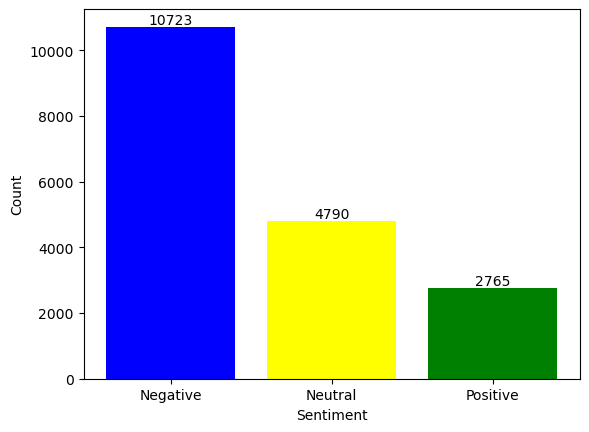

In [30]:
# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Plotting
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'yellow', 'green'])

# Add counts on top of the bars
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [27]:
# Calculate the sentiment distribution as proportions
sentiment_proportions = df['Sentiment'].value_counts(normalize=True)


# Append the proportions to the DataFrame
df['Sentiment_Proportion'] = df['Sentiment'].map(sentiment_proportions)

# Print or display the updated DataFrame
print(sentiment_proportions)

Negative    0.586662
Neutral     0.262064
Positive    0.151275
Name: Sentiment, dtype: float64


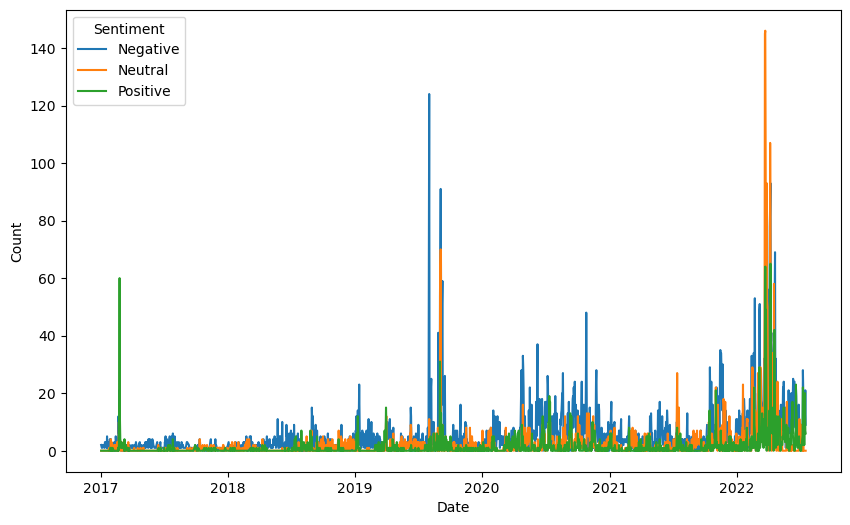

In [29]:
# Convert 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the DataFrame by 'Datetime'
df = df.sort_values(by='Datetime')

# Group by date and calculate the sentiment counts
sentiment_counts = df.groupby(df['Datetime'].dt.date)['Sentiment'].value_counts()

# Reshape the DataFrame for better plotting
sentiment_counts = sentiment_counts.unstack(level=-1).fillna(0)

# Plot a line graph using datetime as the y-axis label
# Sentiment Distribution Over Time
plt.figure(figsize=(10, 6))
for sentiment in sentiment_counts.columns:
    plt.plot(sentiment_counts.index, sentiment_counts[sentiment], label=sentiment)

plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

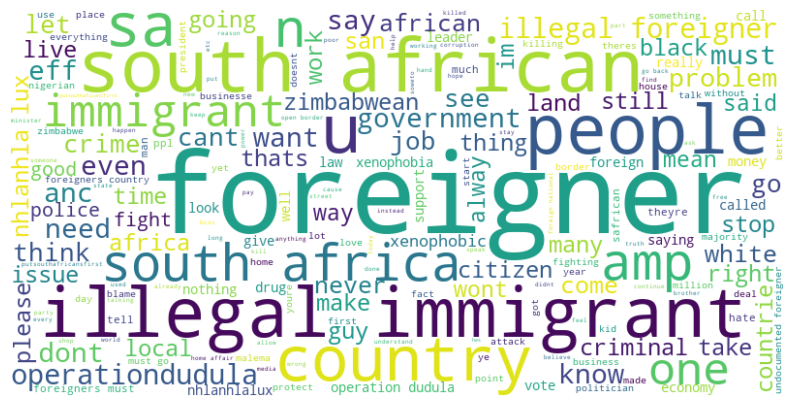

In [38]:
# Combine all text into a single string
text_data = ' '.join(df['Text'].astype(str))

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# WordCloud of Most Appearing Words
# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

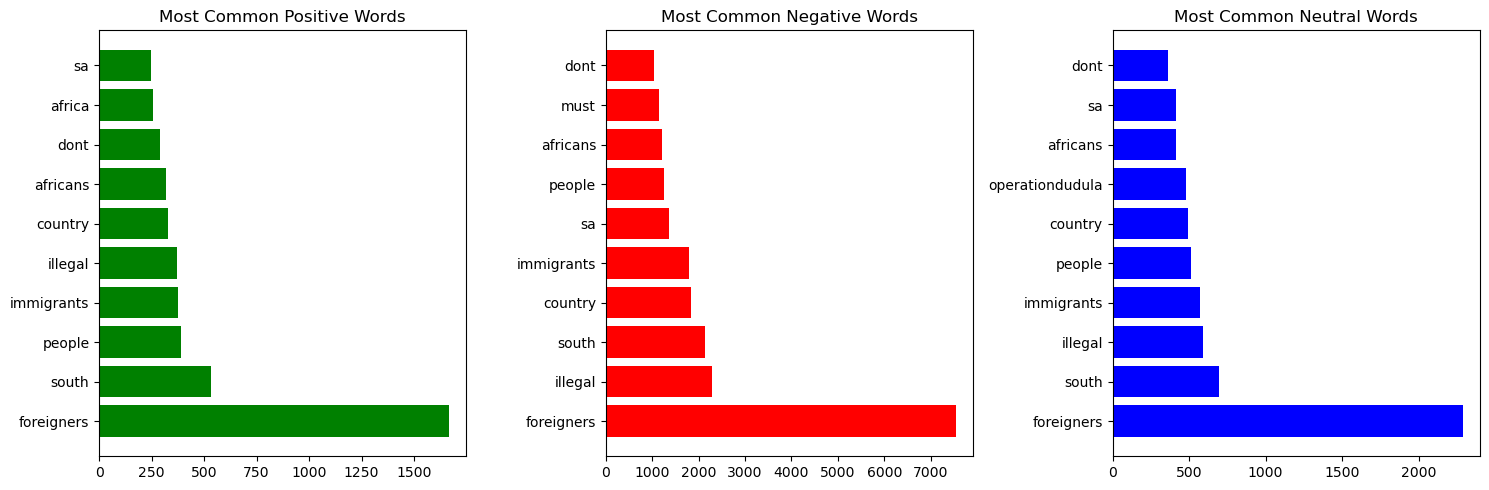

In [58]:
# Initialize dictionaries to store word counts for each sentiment
positive_words = defaultdict(int)
negative_words = defaultdict(int)
neutral_words = defaultdict(int)

# Iterate over the DataFrame and update the counts
for _, row in df.iterrows():
    sentiment = row['Sentiment']
    for word in row['Text'].split():
        if sentiment == 'Positive':
            positive_words[word] += 1
        elif sentiment == 'Negative':
            negative_words[word] += 1
        elif sentiment == 'Neutral':
            neutral_words[word] += 1

# Now, find the most common words for each sentiment
most_common_positive = Counter(positive_words).most_common(10)
most_common_negative = Counter(negative_words).most_common(10)
most_common_neutral = Counter(neutral_words).most_common(10)

# Function to plot a horizontal bar chart for sentiment words
def plot_most_common_words(most_common, title, ax, color):
    words, counts = zip(*most_common)
    ax.barh(words, counts, color=color)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each sentiment
plot_most_common_words(most_common_positive, 'Most Common Positive Words', axes[0], 'green')
plot_most_common_words(most_common_negative, 'Most Common Negative Words', axes[1], 'red')
plot_most_common_words(most_common_neutral, 'Most Common Neutral Words', axes[2], 'blue')

plt.tight_layout()
plt.show()

In [64]:
    # Convert the tweet text into feature vectors using TF-IDF
    vectorizer = TfidfVectorizer()
    feature_vectors = vectorizer.fit_transform(df['Text'])

    # Map sentiment labels to numerical values
    sentiment_mapping = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
    df['Label'] = df['Sentiment'].map(sentiment_mapping)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        feature_vectors, df['Label'], test_size=0.2, random_state=42
    )

    # Create the SVM classifier
    classifier = SVC()

    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Evaluate the classifier on the testing data
    y_pred = classifier.predict(X_test)

    # Print classification report and accuracy
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Function to detect sentiment in a given text
    def detect_sentiment(text):
        # Convert the text into a feature vector using the same vectorizer
        text_vector = vectorizer.transform([text])

        # Predict the label for the text
        prediction = classifier.predict(text_vector)

        # Map the predicted label back to sentiment
        reverse_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}
        predicted_sentiment = reverse_sentiment_mapping[prediction[0]]

        return predicted_sentiment

    # Example usage
    text1 = "We kindly ask Nhlanhla Lux to step aside"
    text2 = "foreigners must leave our country"

    result1 = detect_sentiment(text1)
    result2 = detect_sentiment(text2)

    print(f"Text 1: {text1}\nPredicted Sentiment 1: {result1}\n")
    print(f"Text 2: {text2}\nPredicted Sentiment 2: {result2}\n")

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.98      0.75      2137
           1       0.43      0.01      0.01       518
           2       0.67      0.14      0.23      1001

    accuracy                           0.61      3656
   macro avg       0.57      0.37      0.33      3656
weighted avg       0.60      0.61      0.50      3656

Accuracy: 0.612417943107221
Text 1: We kindly ask Nhlanhla Lux to step aside
Predicted Sentiment 1: Neutral

Text 2: foreigners must leave our country
Predicted Sentiment 2: Negative

